In [1]:
#importing useful packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

The goal of this assignment is to segment customers of a telecom company in the most adequate way. To do so, we will use the dataset at our disposal. We will first conduct an exploratory analysis of this data.

# Exploratory Data Analysis

In [2]:
file = "customers.csv"
data = pd.read_csv(file) #importing the dataset

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
n_obs, n_variables = data.shape
print('This dataset contains ' + str(n_obs), 'observations and ' + str(n_variables), 'variables.')

This dataset contains 7043 observations and 21 variables.


In [5]:
data.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [6]:
data.describe(include=np.number) #description of the numerical variables

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
data.describe(include=np.object) #description of object variables

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,5188-HGMLP,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,20.2,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


The row 'unique' in the table above helps us identify categorical variables, as the number appearing in this row for each column indicates the number of unique occurences for each variable. So, for example when unique = 2, it means that there are only two different occurences for the variable in consideration, i.e., two categories. 

It is interesting to notice that the variable 'TotalCharges' is considerer as an object type variable, while we could imagine this is a purely numerical variable. Let us investigate this variable.

In [8]:
print(data.TotalCharges)

0         29.85
1        1889.5
2        108.15
3       1840.75
4        151.65
         ...   
7038     1990.5
7039     7362.9
7040     346.45
7041      306.6
7042     6844.5
Name: TotalCharges, Length: 7043, dtype: object


In [9]:
data.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

It appears as first like there are no missing values in our dataset. But maybe the missing values are not listed as nans, but are just simply empty cells. We will create a function that will help us identify missing values that can possibly be empty cells:

In [10]:
def count_empty_cells(data, column):
    count = 0
    for i in range(len(data)):
        if data[column].iloc[i] == ' ':
            count+=1
    return count

In [11]:
def find_missing_values(data, missing_value_type):
    table=[] #list where we will store the name of the variable and the number of missing values it has
    if missing_value_type == None:
        table = data.isna().sum()
    elif missing_value_type == 'empty cell':
        for i in range(len(data.columns)):
            column = data.columns[i]
            n_empty_cells = count_empty_cells(data, column)
            table.extend((column, n_empty_cells))
    return table
            
           
    
        

In [12]:
find_missing_values(data, 'empty cell')


['customerID',
 0,
 'gender',
 0,
 'SeniorCitizen',
 0,
 'Partner',
 0,
 'Dependents',
 0,
 'tenure',
 0,
 'PhoneService',
 0,
 'MultipleLines',
 0,
 'InternetService',
 0,
 'OnlineSecurity',
 0,
 'OnlineBackup',
 0,
 'DeviceProtection',
 0,
 'TechSupport',
 0,
 'StreamingTV',
 0,
 'StreamingMovies',
 0,
 'Contract',
 0,
 'PaperlessBilling',
 0,
 'PaymentMethod',
 0,
 'MonthlyCharges',
 0,
 'TotalCharges',
 11,
 'Churn',
 0]

It is now clear that the variable 'TotalCharges' contains missing values, and it is the only variable of the dataset which does.

So the column 'TotalCharges' contains 11 missing values. Since it represents a very low proportion of the total number of observations, we decide to drop them instead of replacing them, which could alterate our future work.

In [13]:
data['TotalCharges'] = data['TotalCharges'].replace(" ", np.nan) #We first replace the empty cell by a 'NaN'
data['TotalCharges'] = data['TotalCharges'].astype('float') #We set it to be as a float variable
data = data[data["TotalCharges"].notnull()]  #We delete the observations (hence the rows) containing missing values



In [14]:
data.shape

(7032, 21)

We are interested in the lifetime value of loyal customers. Thus, we can ignore (for now) those who leave the company (churn). Hence we drop the Churn column.

In [16]:
data.drop(columns='Churn',inplace=True)
#Index is already a good ID for clients
data.drop(columns='customerID',inplace=True)

As we are intrested in the lifetime value of the contracts, we can compute the average monthly expense of each customer, then the lifetime value of the contracts could be extrapolate from the average lifetime of the contracts.

In [17]:
data['MonthlyExpense'] = data['TotalCharges']/data['tenure']

Now we would be interested in knowing how these average monthly expenses are explain by the other features. But first we need to do some feature engineering. Indeed as we have seen during de preliminary data inspection, we have a lot of categorical feature that we will need to map to numerical value. When it is a binary value, e.g. yes/no or male/female we can directly replace it by 0 or I. When there is more possibility like for the 'contract' feature we will use the pd.factorize() function to establish a numerical mapping. Furthermore, notice that some feature present redundant information such as the 'No phone service' information that is already present in the 'PhoneService' feature and the 'No internet service' present in all the internet related services features that could be placed in a separated feature: 'InternetService' under the form of true or false (an additional column will be created for 'Fiber'->True/False). Proceeding this way most of the categorical feature will become binary except 'contract' and 'payement method'.

In [18]:
data.dtypes

gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
MonthlyExpense      float64
dtype: object

In [19]:
for column in data.select_dtypes(include=np.object).columns:

    print(column)
    print(set(data[column]))

gender
{'Female', 'Male'}
Partner
{'No', 'Yes'}
Dependents
{'No', 'Yes'}
PhoneService
{'No', 'Yes'}
MultipleLines
{'No phone service', 'No', 'Yes'}
InternetService
{'No', 'DSL', 'Fiber optic'}
OnlineSecurity
{'No internet service', 'No', 'Yes'}
OnlineBackup
{'No internet service', 'No', 'Yes'}
DeviceProtection
{'No internet service', 'No', 'Yes'}
TechSupport
{'No internet service', 'No', 'Yes'}
StreamingTV
{'No internet service', 'No', 'Yes'}
StreamingMovies
{'No internet service', 'No', 'Yes'}
Contract
{'Month-to-month', 'Two year', 'One year'}
PaperlessBilling
{'No', 'Yes'}
PaymentMethod
{'Bank transfer (automatic)', 'Electronic check', 'Mailed check', 'Credit card (automatic)'}


In [20]:
# 1 if male, 0 otherwise
data['gender'] = (data['gender']=='Male')*1

In [21]:
# 1 if internet, 0 otherwise
data['Internet'] = (~(data['InternetService'] == 'No'))*1
# 1 if fiber, 0 if DSL
data['Fiber'] = (data['InternetService'] == 'Fiber optic')*1

# Now can drop 'InternetService' feature because same information
data.drop(columns='InternetService', inplace=True)

In [22]:
# 0 -> month to month
# 1 -> 1 year
# 2 -> 2 year
data['Contract'] = pd.factorize(data['Contract'])[0]

In [23]:
# Electronic check          -> 0
# Mailed check              -> 1
# Bank transfer (automatic) -> 2
# Credit card (automatic)   -> 3
data['PaymentMethod'] = pd.factorize(data['PaymentMethod'])[0]

In [24]:
# Deal with the rest of categorical variable
# Yes -> 1
# No  -> 0
for column in data.select_dtypes(include=np.object).columns:
    data[column] = (data[column]=='Yes')*1

In [25]:
data.dtypes

gender                int64
SeniorCitizen         int64
Partner               int64
Dependents            int64
tenure                int64
PhoneService          int64
MultipleLines         int64
OnlineSecurity        int64
OnlineBackup          int64
DeviceProtection      int64
TechSupport           int64
StreamingTV           int64
StreamingMovies       int64
Contract              int64
PaperlessBilling      int64
PaymentMethod         int64
MonthlyCharges      float64
TotalCharges        float64
MonthlyExpense      float64
Internet              int64
Fiber                 int64
dtype: object

## Feature selection

### Correlation of features
We obtain the correlation between features, and can observe wich feature are the most corrolated with our independent variable 'MonthlyExpense'. It comes with no surprise that it has a maximal correlation with the 'MonthlyCharges' since it is almost the same observable. Therefore we will drop 'MonthlyCharges' in our subsequent feature analysis

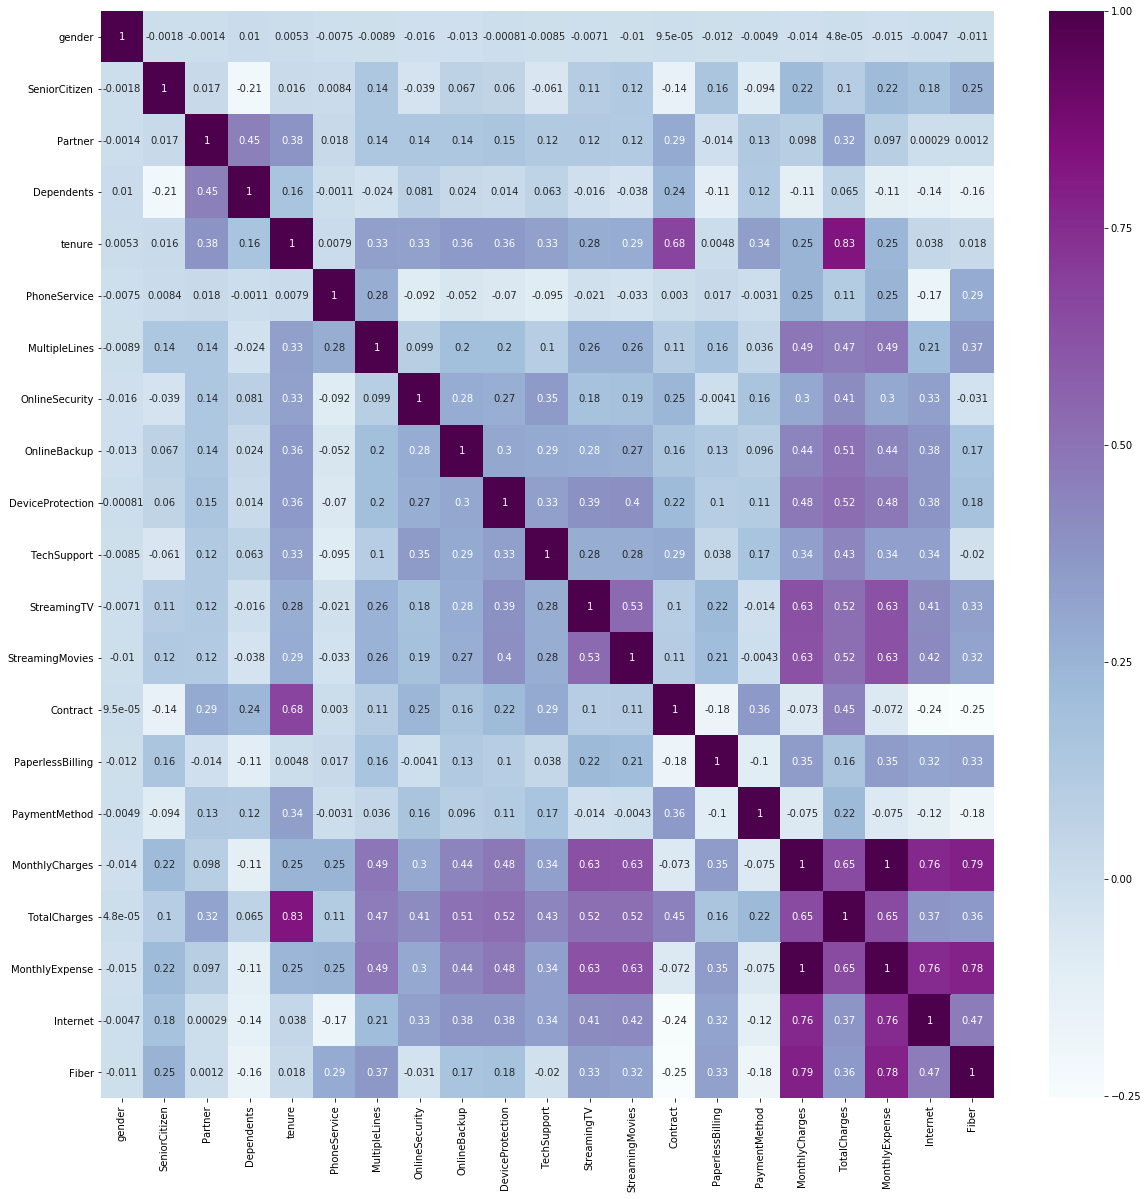

In [30]:
import seaborn as sns

plt.figure(figsize=(20,20))
g=sns.heatmap(data.corr(),annot=True,cmap='BuPu')

### Uivariate selection
Univariate linear regression tests.
Linear model for testing the individual effect of each of many regressors.
This is done in 2 steps:
    * The correlation between each regressor and the target is computed, that is, ((X[:, i] - mean(X[:, i])) * (y - mean_y)) / (std(X[:, i]) * std(y)).
    * It is converted to an F score then to a p-value.

In [26]:
from sklearn.feature_selection import f_regression

y = data['MonthlyExpense']  #independent variable
x = data.drop(columns=['MonthlyExpense','MonthlyCharges'])    #feature

F_val, p_val = f_regression(x,y)

bestfeatures = pd.DataFrame(index=x.columns)
bestfeatures['F_value'] = F_val
bestfeatures['p_value'] = p_val

bestfeatures.sort_values('F_value',ascending=False)

,F_value,p_value
MonthlyCharges,928903.501222,0.000000e+00
Fiber,11175.546294,0.000000e+00
Internet,9598.503010,0.000000e+00
TotalCharges,5168.313915,0.000000e+00
StreamingTV,4541.702835,0.000000e+00
StreamingMovies,4532.122287,0.000000e+00
MultipleLines,2218.661248,0.000000e+00
DeviceProtection,2124.742692,0.000000e+00
OnlineBackup,1683.053215,0.000000e+00
PaperlessBilling,977.961622,4.006830e-201


### Feature importance
Feature importance gives a score for each feature of your data based on an inbuilt class that comes with Tree Based Classifiers, the higher the score more important or relevant is the feature towards the output variable.


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


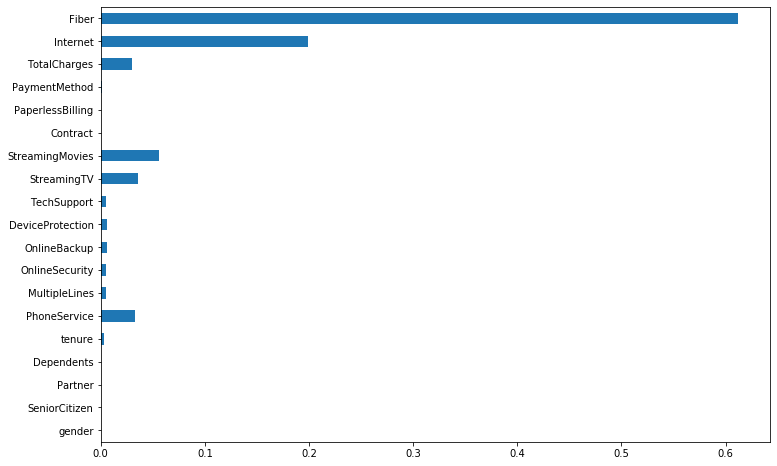

In [27]:
from sklearn.ensemble import RandomForestRegressor

x = data.drop(columns=['MonthlyExpense','MonthlyCharges']) 

model = RandomForestRegressor()
model.fit(x, y)

feat_importances = pd.DataFrame(model.feature_importances_, index=x.columns)


feat_importances.plot(kind='barh',legend=False,figsize=(12,8))

plt.show()

### Correlation of features

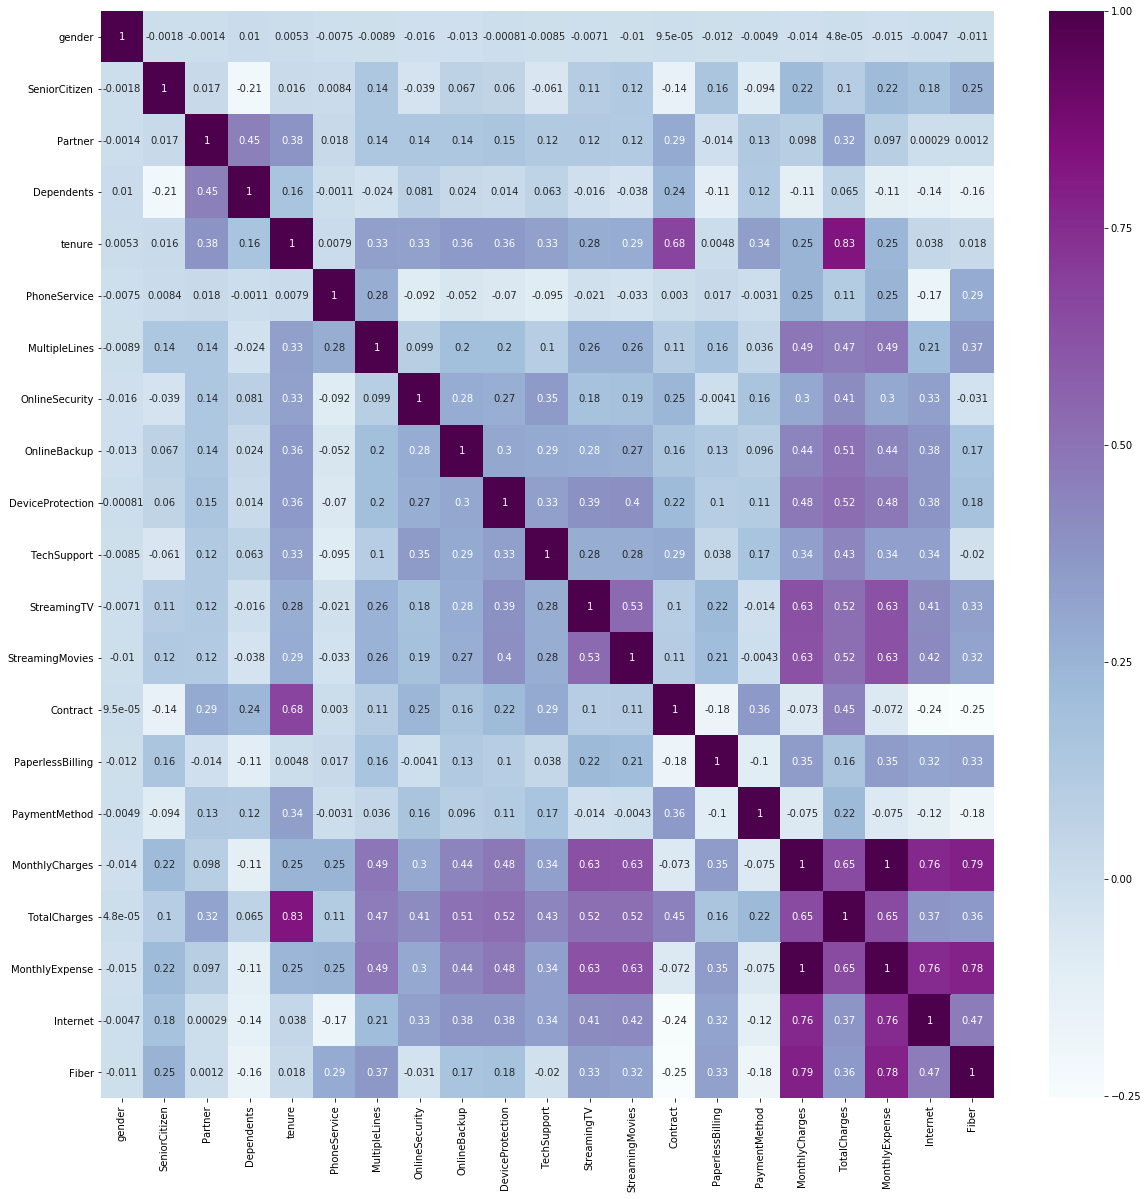

In [28]:
import seaborn as sns

plt.figure(figsize=(20,20))
g=sns.heatmap(data.corr(),annot=True,cmap='BuPu')